In [1]:
# Librerías para el manejo de datos
import pandas as pd
import numpy as np

In [2]:
# Cargar los datos de empleo, población, nacimientos, defunciones y afiliados a la seguridad social
emp = pd.read_excel("Emp.xlsx")
pob = pd.read_excel("Pob1998.xlsx")
nac = pd.read_excel("NacimientosMunicipios.xlsx")
defu = pd.read_excel("DefuncionesMunicipio.xlsx")
afi = pd.read_excel("AfiliadosMunicipios.xlsx")

# Diferencia población

In [3]:
pob

,Num,Municipio,2022,2021,2020,2019,2018,2017,2016,2015,...,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998
0,1,Castellón,590616,587064,585590,579962,576898,575470,579245,582327,...,573282,559761,543432,527345,518239,501237,485173,474385,467895,461712
1,2,Valencia,2605757,2589312,2591875,2565124,2547986,2540707,2544264,2543315,...,2486483,2463592,2416628,2358919,2320297,2267503,2227170,2201200,2187633,2172796
2,3,Alicante,1901594,1881762,1879888,1858683,1838819,1825332,1836459,1855047,...,1825264,1783555,1732389,1657040,1632349,1557968,1490265,1445144,1410946,1388933
3,3001,"Atzúbia, l'",616,609,611,632,661,664,689,632,...,668,627,611,635,587,605,570,547,558,579
4,3002,Agost,4948,4906,4794,4758,4713,4703,4729,4707,...,4766,4723,4601,4517,4451,4284,4146,4095,4053,4023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,46262,"Yesa, La",227,230,221,229,227,234,242,252,...,264,246,251,250,254,267,279,283,282,287
541,46263,Zarra,370,364,346,359,365,381,440,463,...,543,492,472,442,413,400,408,424,425,416
542,46902,Gátova,412,419,405,378,392,398,366,364,...,466,459,451,432,467,475,500,500,502,502
543,46903,San Antonio de Benagéber,9874,9501,9286,9089,8846,8755,8463,7981,...,4985,4702,4356,4021,3508,3150,2989,2719,2434,2142


In [4]:
# Seleccionar únicamente los años que nos interesan
columns_to_keep = ['Num', '2021', '2016', '2011']
difpob = pob[columns_to_keep].copy()  # Crear una copia explícita

# Sacar la diferencia
difpob['dif_2021'] = difpob['2021'] - difpob['2016']
difpob['dif_2016'] = difpob['2016'] - difpob['2011']

# Algunos códigos INE solo tienen 4 dígitos cuando deben ser 5 debido a que por defecto se les quita el 0 de delante
difpob['Num'] = difpob['Num'].apply(lambda x: f"0{x}" if len(str(x)) == 4 else str(x))

# Renombrar la columna diferencia al año correspondiente
dift = difpob[['Num', 'dif_2021', 'dif_2016']].copy()  # Crear una copia explícita
dift.rename(columns={'dif_2021': '2021', 'dif_2016': '2016'}, inplace=True)

# Tener la columna años
ddifpob = pd.melt(dift, id_vars=['Num'], var_name="Año", value_name="Dif_pob")

# Imprimimos los datos resultantes
ddifpob.to_excel("Difpob.xlsx", index=False)

In [5]:
ddifpob

,Num,Año,Dif_pob
0,1,2021,7819
1,2,2021,45048
2,3,2021,45303
3,03001,2021,-80
4,03002,2021,177
...,...,...,...
1085,46262,2016,-23
1086,46263,2016,-126
1087,46902,2016,-94
1088,46903,2016,1607


# Diferencia Relativa

In [6]:
# Seleccionar únicamente los años que nos interesan
columns_to_keep = ['Num', '2021', '2016', '2011']
difrelpob = pob[columns_to_keep].copy()  # Crear una copia explícita

# Sacar la diferencia
difrelpob['dif_2021'] = (((difrelpob['2021'] - difrelpob['2016']) / difrelpob['2016']) * 100).round(2)
difrelpob['dif_2016'] = (((difrelpob['2016'] - difrelpob['2011']) / difrelpob['2011']) * 100).round(2)

# Algunos códigos INE solo tienen 4 dígitos cuando deben ser 5 debido a que por defecto se les quita el 0 de delante
difrelpob['Num'] = difrelpob['Num'].apply(lambda x: f"0{x}" if len(str(x)) == 4 else str(x))

# Renombrar la columna diferencia al año correspondiente
dift = difrelpob[['Num', 'dif_2021', 'dif_2016']].copy()  # Crear una copia explícita
dift.rename(columns={'dif_2021': '2021', 'dif_2016': '2016'}, inplace=True)

# Tener la columna años
ddifrelpob = pd.melt(dift, id_vars=['Num'], var_name="Año", value_name="Difrel_pob")

In [7]:
ddifrelpob

,Num,Año,Difrel_pob
0,1,2021,1.35
1,2,2021,1.77
2,3,2021,2.47
3,03001,2021,-11.61
4,03002,2021,3.74
...,...,...,...
1085,46262,2016,-8.68
1086,46263,2016,-22.26
1087,46902,2016,-20.43
1088,46903,2016,23.44


# Población

In [8]:
# Utilizar la función melt() para transformar los datos
# Dejamos sólo Num y los años
pob = pob.drop('Municipio', axis=1)
dpob = pd.melt(pob, id_vars=['Num'], var_name="Año", value_name="N_pob")
# Algunos código INE sólo tienen 4 dígitos cuando deben ser 5 debido a que por defecto se les quita el 0 de delante
for i in range(len(dpob)):
    if len(str(dpob.iloc[i, 0])) == 4:
        dpob.iloc[i, 0] = "0" + str(dpob.iloc[i, 0])

In [9]:
dpob

,Num,Año,N_pob
0,1,2022,590616
1,2,2022,2605757
2,3,2022,1901594
3,03001,2022,616
4,03002,2022,4948
...,...,...,...
13620,46262,1998,287
13621,46263,1998,416
13622,46902,1998,502
13623,46903,1998,2142


# Emp

In [10]:
# Únicamente quedarnos con el año 2016
emp2016 = emp.drop(emp.columns[[3, 4, 5]], axis=1)
pob2016 = pob[['Num', '2016']].copy()
pob2016 = pob2016.rename(columns={'2016': 'pob2016'})
# Tener en la misma tabla la población y el número de empresas de 2016
empo2016 = emp2016.merge(pob2016, on='Num')
empo2016 = empo2016.rename(columns={2018: 'emp2016'})
# Eliminamos los municipios que no tienen datos
empo2016 = empo2016[empo2016['emp2016'] != '-']
empo2016 = empo2016[empo2016['pob2016'] != '-']
# Quedarnos con el número de empresas por cada habitante, multiplicado por 1000
empo2016['emp2016'] = empo2016['emp2016'].astype(float)
empo2016['pob2016'] = empo2016['pob2016'].astype(float)
empo2016['emp/pob2016'] = (empo2016['emp2016'] / empo2016['pob2016']) * 1000
# Dejamos sólo Num y los años
empo2016 = empo2016.drop(['Municipio', 'emp2016', 'pob2016'], axis=1)
empo2016 = empo2016.rename(columns={'emp/pob2016': '2016'})
demp2016 = pd.melt(empo2016, id_vars=['Num'], var_name="Año", value_name="emp/pob")
# Algunos código INE sólo tienen 4 dígitos cuando deben ser 5 debido a que por defecto se les quita el 0 de delante
for i in range(len(demp2016)):
    if len(str(demp2016.iloc[i, 0])) == 4:
        demp2016.iloc[i, 0] = "0" + str(demp2016.iloc[i, 0])

In [11]:
demp2016

,Num,Año,emp/pob
0,3,2016,75.636864
1,03001,2016,47.895501
2,03002,2016,69.570734
3,03003,2016,63.716814
4,03004,2016,62.975027
...,...,...,...
510,46262,2016,49.586777
511,46263,2016,36.363636
512,46902,2016,65.573770
513,46903,2016,75.741463


In [12]:
# Únicamente quedarnos con el año 2021
emp2021 = emp.drop(emp.columns[[2, 3, 4]], axis=1)
pob2021 = pob[['Num', '2021']].copy()
pob2021 = pob2021.rename(columns={'2021': 'pob2021'})
# Tener en la misma tabla la población y el número de empresas de 2021
empo2021 = emp2021.merge(pob2021, on='Num')
empo2021 = empo2021.rename(columns={2021: 'emp2021'})
# Eliminamos los municipios que no tienen datos
empo2021 = empo2021[empo2021['emp2021'] != '-']
empo2021 = empo2021[empo2021['pob2021'] != '-']
# Quedarnos con el número de empresas por cada habitante, multiplicado por 1000
empo2021['emp2021'] = empo2021['emp2021'].astype(float)
empo2021['pob2021'] = empo2021['pob2021'].astype(float)
empo2021['emp/pob2021'] = (empo2021['emp2021'] / empo2021['pob2021']) * 1000
# Dejamos sólo Num y los años
empo2021 = empo2021.drop(['Municipio', 'emp2021', 'pob2021'], axis=1)
empo2021 = empo2021.rename(columns={'emp/pob2021': '2021'})
demp2021 = pd.melt(empo2021, id_vars=['Num'], var_name="Año", value_name="emp/pob")
# Algunos código INE sólo tienen 4 dígitos cuando deben ser 5 debido a que por defecto se les quita el 0 de delante
for i in range(len(demp2021)):
    if len(str(demp2021.iloc[i, 0])) == 4:
        demp2021.iloc[i, 0] = "0" + str(demp2021.iloc[i, 0])

In [13]:
demp2021

,Num,Año,emp/pob
0,3,2021,77.960443
1,03001,2021,65.681445
2,03002,2021,68.691398
3,03003,2021,63.793103
4,03004,2021,67.683508
...,...,...,...
509,46262,2021,52.173913
510,46263,2021,65.934066
511,46902,2021,66.825776
512,46903,2021,75.360488


# Afiliados 

In [14]:
# Únicamente quedarnos con el año 2016
afi2016 = afi[['Num', 2016]].copy()
pob2016 = pob[['Num', '2016']].copy()
pob2016 = pob2016.rename(columns={'2016': 'pob2016'})
# Tener en la misma tabla la población y el número de afiliados a la seguridad social de 2016
afipob2016 = afi2016.merge(pob2016, on='Num')
afipob2016 = afipob2016.rename(columns={2016: 'afi2016'})
# Eliminamos los municipios que no tienen datos
afipob2016 = afipob2016[afipob2016['afi2016'] != '-']
afipob2016 = afipob2016[afipob2016['pob2016'] != '-']
# Quedarnos con el número de afiliados por cada habitante, multiplicado por 1000
afipob2016['afi2016'] = afipob2016['afi2016'].astype(float)
afipob2016['pob2016'] = afipob2016['pob2016'].astype(float)
afipob2016['afi/pob2016'] = (afipob2016['afi2016'] / afipob2016['pob2016']) * 1000
# Dejamos sólo Num y los años
afipob2016 = afipob2016.drop(['afi2016', 'pob2016'], axis=1)
afipob2016 = afipob2016.rename(columns={'afi/pob2016': '2016'})
dafi2016 = pd.melt(afipob2016, id_vars=['Num'], var_name="Año", value_name="afi/pob")
# Algunos código INE sólo tienen 4 dígitos cuando deben ser 5 debido a que por defecto se les quita el 0 de delante
for i in range(len(dafi2016)):
    if len(str(dafi2016.iloc[i, 0])) == 4:
        dafi2016.iloc[i, 0] = "0" + str(dafi2016.iloc[i, 0])

In [15]:
dafi2016

,Num,Año,afi/pob
0,3,2016,318.715528
1,03001,2016,129.172714
2,03002,2016,350.179742
3,03003,2016,205.309735
4,03004,2016,111.834962
...,...,...,...
533,46262,2016,223.140496
534,46263,2016,118.181818
535,46902,2016,122.950820
536,46903,2016,206.309819


In [16]:
# Únicamente quedarnos con el año 2021
afi2021 = afi[['Num', 2021]].copy()
pob2021 = pob[['Num', '2021']].copy()
pob2021 = pob2021.rename(columns={'2021': 'pob2021'})
# Tener en la misma tabla la población y el número de afiliados a la seguridad social de 2021
afipob2021 = afi2021.merge(pob2021, on='Num')
afipob2021 = afipob2021.rename(columns={2021: 'afi2021'})
# Eliminamos los municipios que no tienen datos
afipob2021 = afipob2021[afipob2021['afi2021'] != '-']
afipob2021 = afipob2021[afipob2021['pob2021'] != '-']
# Quedarnos con el número de afiliados por cada habitante, multiplicado por 1000
afipob2021['afi2021'] = afipob2021['afi2021'].astype(float)
afipob2021['pob2021'] = afipob2021['pob2021'].astype(float)
afipob2021['afi/pob2021'] = (afipob2021['afi2021'] / afipob2021['pob2021']) * 1000
# Dejamos sólo Num y los años
afipob2021 = afipob2021.drop(['afi2021', 'pob2021'], axis=1)
afipob2021 = afipob2021.rename(columns={'afi/pob2021': '2021'})
dafi2021 = pd.melt(afipob2021, id_vars=['Num'], var_name="Año", value_name="afi/pob")
# Algunos código INE sólo tienen 4 dígitos cuando deben ser 5 debido a que por defecto se les quita el 0 de delante
for i in range(len(dafi2021)):
    if len(str(dafi2021.iloc[i, 0])) == 4:
        dafi2021.iloc[i, 0] = "0" + str(dafi2021.iloc[i, 0])

In [17]:
dafi2021

,Num,Año,afi/pob
0,3,2021,338.731466
1,03001,2021,238.095238
2,03002,2021,335.711374
3,03003,2021,165.517241
4,03004,2021,126.787417
...,...,...,...
537,46262,2021,226.086957
538,46263,2021,260.989011
539,46902,2021,152.744630
540,46903,2021,205.873066


# Accesibilidad

In [18]:
# Nos descargamos la base de datos con los tiemos de accesibilidad a los servicios básicos
Lau2016 = pd.read_excel("Acc2016.xlsx")
# Eliminamos valor innecesarios para nuestro propósito, como el cellid, código del país y coordenadas
columns_to_drop = [0,1, 2, 3, 5]  
Lau2016 = Lau2016.drop(Lau2016.columns[columns_to_drop], axis=1)

# Agrupamos los municipios por su número INE y calculamos la media de los valores según el número de celdas en su interior
grouped = Lau2016.groupby(Lau2016.columns[0])  # Agrupamos por los valores de la columna 0
Mun2016 = pd.DataFrame(columns=Lau2016.columns)  # Creamos un DataFrame vacío con las mismas columnas que Lau2
for digit, group in grouped:
    if len(group) == 1:  # Verificamos si no hay repeticiones del dígito
        Mun2016 = Mun2016.append(group)  # Agregamos la fila al DataFrame Mun2016
    else:
        new_row = group.mean()  # Calculamos la media de los valores de las otras columnas
        new_row[Lau2016.columns[0]] = digit  # Establecemos el dígito en la columna 0
        Mun2016 = Mun2016.append(new_row, ignore_index=True)  # Agregamos la nueva fila a Mun2016
Mun2016 = Mun2016.reset_index(drop=True)  # Restablecer los índices del DataFrame Mun2016

# Transformamos el Num para que sea de 5 dígitos (como el original) y corregimos el error por defecto del tipo int .0
for i in range(len(Mun2016)):
    if len(str(Mun2016.iloc[i, 0])[:-2]) == 4:
        Mun2016.iloc[i, 0] = "0" + str(Mun2016.iloc[i, 0])[:-2]
    elif len(str(Mun2016.iloc[i, 0])[:-2]) == 5:
        Mun2016.iloc[i, 0] = str(Mun2016.iloc[i, 0])[:-2]
        
# Añadimos el año 2016
Mun2016.insert(1, "Año", 2016)
dacc2016 = Mun2016

In [19]:
dacc2016

,Num,Año,Banks_TT,Jobs_TT,Shops_TT,Hosp_TT,Pharm_TT,Docs_TT,PrimS_TT,SecS_TT,Stats_TT,Cine_TT
0,02009,2016,37.436714,87.836000,36.710571,33.961714,37.091714,31.709571,30.606714,30.161857,33.643143,56.361714
1,02010,2016,39.839000,117.102667,39.847000,34.150000,36.331000,21.864000,21.738667,21.738667,23.424667,54.901000
2,02025,2016,13.832000,66.114000,13.695000,13.496000,13.626000,5.551000,4.330000,5.720000,6.572000,16.882000
3,03001,2016,16.297000,16.541000,8.357000,16.440000,6.005000,6.172000,8.352000,8.352000,20.534000,14.667000
4,03002,2016,14.117545,12.842636,13.395091,15.211818,8.962182,8.744000,8.713727,8.684636,14.012727,14.998091
...,...,...,...,...,...,...,...,...,...,...,...,...
494,46261,2016,46.012944,78.182500,37.469333,47.058222,35.799556,24.511056,28.508111,33.367056,33.976944,51.070278
495,46262,2016,46.827583,104.548667,31.997917,37.401667,35.744417,15.037833,27.314667,18.505667,43.698583,56.175250
496,46263,2016,20.603833,108.241667,20.611667,35.580833,20.416333,17.561833,19.027500,20.855333,36.941500,51.871667
497,46902,2016,34.311333,40.656500,15.954000,32.596333,15.872000,15.613500,23.114500,30.029667,35.314000,48.128333


In [20]:
# Nos descargamos la base de datos con los tiemos de accesibilidad a los servicios básicos
Lau2021 = pd.read_excel("Acc2021.xlsx")
# Eliminamos valor innecesarios para nuestro propósitoc, como el cellid, código del país y coordenadas
columns_to_drop = [0,1, 2, 3, 5, 6]  
Lau2021 = Lau2021.drop(Lau2021.columns[columns_to_drop], axis=1)

# Agrupamos los municiìos por su número INE y calculamos la media de los valores según el número de celdas en su interior
grouped = Lau2021.groupby(Lau2021.columns[0])  # Agrupamos por los valores de la columna 0
Mun2021 = pd.DataFrame(columns=Lau2021.columns)  # Creamos un DataFrame vacío con las mismas columnas que Lau2021
for digit, group in grouped:
    if len(group) == 1:  # Verificamos si no hay repeticiones del dígito
        Mun2021 = Mun2021.append(group)  # Agregamos la fila al DataFrame Mun2021
    else:
        new_row = group.mean()  # Calculamos la media de los valores de las otras columnas
        new_row[Lau2021.columns[0]] = digit  # Establecemos el dígito en la columna 0
        Mun2021 = Mun2021.append(new_row, ignore_index=True)  # Agregamos la nueva fila a Mun2021
Mun2021 = Mun2021.reset_index(drop=True)  # Restablecer los índices del DataFrame Mun2021

# Transformamos el Num para que sea de 5 dígitos (como el original) y corregimos el error por defecto del tipo int .0
for i in range(len(Mun2021)):
    if len(str(Mun2021.iloc[i, 0])[:-2]) == 4:
        Mun2021.iloc[i, 0] = "0" + str(Mun2021.iloc[i, 0])[:-2]
    elif len(str(Mun2021.iloc[i, 0])[:-2]) == 5:
        Mun2021.iloc[i, 0] = str(Mun2021.iloc[i, 0])[:-2]
        
# Añadimos el año 2021
Mun2021.insert(1, "Año", 2021)
dacc2021 = Mun2021

In [21]:
dacc2021

,Num,Año,Banks_TT,Jobs_TT,Shops_TT,Hosp_TT,Pharm_TT,Docs_TT,PrimS_TT,SecS_TT,Stats_TT,Cine_TT
0,02009,2021,43.091571,87.836000,43.697571,42.207714,43.089000,61.418571,43.312714,42.204286,44.441857,70.673000
1,02010,2021,22.810667,117.102667,23.256333,22.299667,11.622667,39.888333,22.093667,11.712333,13.125333,43.809333
2,02025,2021,3.497000,66.114000,3.093000,11.238000,3.309000,6.713000,3.005000,4.133000,2.353000,15.252000
3,03001,2021,10.324000,16.541000,3.772000,12.059000,1.617000,10.563000,9.266000,9.149000,15.119000,10.253000
4,03002,2021,18.926091,12.842636,18.514182,20.230909,10.703909,21.343909,10.364909,10.559182,19.555364,20.455545
...,...,...,...,...,...,...,...,...,...,...,...,...
494,46261,2021,15.152889,78.182500,17.176000,28.091056,19.670500,34.078611,16.574333,18.443333,18.966611,35.770667
495,46262,2021,20.483417,104.548667,18.787667,33.437583,21.996583,44.335000,17.515917,19.739667,38.909417,45.004333
496,46263,2021,6.079000,108.241667,8.173667,19.978500,5.553333,37.171500,4.360167,7.834000,22.041500,33.583667
497,46902,2021,25.803333,40.656500,27.741500,23.295333,9.800000,37.915833,9.599500,22.569167,26.450667,39.808333


# Merge

In [22]:
# Para poder juntar las tablas según las columnas año 202 y número INE deben ser del mismo tipo
dacc2016['Num'] = dacc2016['Num'].astype(str)
dacc2016['Año'] = dacc2016['Año'].astype(str)

demp2016['Num'] = demp2016['Num'].astype(str)
demp2016['Año'] = demp2016['Año'].astype(str)

dafi2016['Num'] = dafi2016['Num'].astype(str)
dafi2016['Año'] = dafi2016['Año'].astype(str)

vind2016 = dacc2016.merge(demp2016, on=['Num', 'Año']).merge(dafi2016, on=['Num', 'Año'])

vind2016

,Num,Año,Banks_TT,Jobs_TT,Shops_TT,Hosp_TT,Pharm_TT,Docs_TT,PrimS_TT,SecS_TT,Stats_TT,Cine_TT,emp/pob,afi/pob
0,03001,2016,16.297000,16.541000,8.357000,16.440000,6.005000,6.172000,8.352000,8.352000,20.534000,14.667000,47.895501,129.172714
1,03002,2016,14.117545,12.842636,13.395091,15.211818,8.962182,8.744000,8.713727,8.684636,14.012727,14.998091,69.570734,350.179742
2,03003,2016,12.072250,14.974000,11.878000,17.045000,11.990250,7.720750,9.316500,12.404000,10.838500,39.261750,63.716814,205.309735
3,03004,2016,19.605000,23.848000,7.356000,18.031500,12.484500,7.467000,6.927000,13.930000,13.575000,16.173000,62.975027,111.834962
4,03005,2016,9.495500,12.029625,9.514750,15.750875,9.541500,7.954750,7.958000,8.065875,15.007250,16.800875,69.751616,257.995917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,46261,2016,46.012944,78.182500,37.469333,47.058222,35.799556,24.511056,28.508111,33.367056,33.976944,51.070278,55.796056,148.148148
451,46262,2016,46.827583,104.548667,31.997917,37.401667,35.744417,15.037833,27.314667,18.505667,43.698583,56.175250,49.586777,223.140496
452,46263,2016,20.603833,108.241667,20.611667,35.580833,20.416333,17.561833,19.027500,20.855333,36.941500,51.871667,36.363636,118.181818
453,46902,2016,34.311333,40.656500,15.954000,32.596333,15.872000,15.613500,23.114500,30.029667,35.314000,48.128333,65.573770,122.950820


In [23]:
# Para poder juntar las tablas según las columnas año 202 y número INE deben ser del mismo tipo
dacc2021['Num'] = dacc2021['Num'].astype(str)
dacc2021['Año'] = dacc2021['Año'].astype(str)

demp2021['Num'] = demp2021['Num'].astype(str)
demp2021['Año'] = demp2021['Año'].astype(str)

dafi2021['Num'] = dafi2021['Num'].astype(str)
dafi2021['Año'] = dafi2021['Año'].astype(str)

vind2021 = dacc2021.merge(demp2021, on=['Num', 'Año']).merge(dafi2021, on=['Num', 'Año'])

vind2021

,Num,Año,Banks_TT,Jobs_TT,Shops_TT,Hosp_TT,Pharm_TT,Docs_TT,PrimS_TT,SecS_TT,Stats_TT,Cine_TT,emp/pob,afi/pob
0,03001,2021,10.324000,16.541000,3.772000,12.059000,1.617000,10.563000,9.266000,9.149000,15.119000,10.253000,65.681445,238.095238
1,03002,2021,18.926091,12.842636,18.514182,20.230909,10.703909,21.343909,10.364909,10.559182,19.555364,20.455545,68.691398,335.711374
2,03003,2021,4.723250,14.974000,12.115500,13.358000,4.540250,17.678500,7.843000,10.965750,9.267750,35.595500,63.793103,165.517241
3,03004,2021,11.509500,23.848000,10.170500,14.176500,3.171500,12.898500,3.418500,11.121500,9.818500,12.696500,67.683508,126.787417
4,03005,2021,8.140000,12.029625,9.058125,14.664625,6.476500,11.250125,6.581000,6.745000,14.960000,15.324750,67.012742,265.298097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,46261,2021,15.152889,78.182500,17.176000,28.091056,19.670500,34.078611,16.574333,18.443333,18.966611,35.770667,53.030303,167.613636
451,46262,2021,20.483417,104.548667,18.787667,33.437583,21.996583,44.335000,17.515917,19.739667,38.909417,45.004333,52.173913,226.086957
452,46263,2021,6.079000,108.241667,8.173667,19.978500,5.553333,37.171500,4.360167,7.834000,22.041500,33.583667,65.934066,260.989011
453,46902,2021,25.803333,40.656500,27.741500,23.295333,9.800000,37.915833,9.599500,22.569167,26.450667,39.808333,66.825776,152.744630


In [24]:
# Extraemos los números INE final que quedan.
# - Algunas se han perdido porque algunas municipios no correspondían con ninguna celda del grid, 
# esto puede pasar al ser muy pequeño y las celdas pertenecer en su mayoría a municipios vecino,
# por lo que acaba no teniendo celda asociada. Es el caso de 46904	Benicull de Xúquer 
# Además se han quitado los municipios que no tenían valores para no afectar al resultado del modelo-
# Y lo utilizamos para extraer nuestra variable dependiente final con la diferencia de población por cada municipio
numf = vind2016[['Num']].copy()
numf['Num'] = numf['Num'].astype(str)
ddifpob['Num'] = ddifpob['Num'].astype(str)
vdepdifpob2016 = ddifpob.merge(numf, on=['Num'])

numf = vind2016[['Num']].copy()
numf['Num'] = numf['Num'].astype(str)
ddifrelpob['Num'] = ddifrelpob['Num'].astype(str)
vdepdifrelpob2016 = ddifrelpob.merge(numf, on=['Num'])

In [25]:
numf = vind2021[['Num']].copy()
numf['Num'] = numf['Num'].astype(str)
ddifpob['Num'] = ddifpob['Num'].astype(str)
vdepdifpob2021 = ddifpob.merge(numf, on=['Num'])

numf = vind2021[['Num']].copy()
numf['Num'] = numf['Num'].astype(str)
ddifrelpob['Num'] = ddifrelpob['Num'].astype(str)
vdepdifrelpob2021 = ddifrelpob.merge(numf, on=['Num'])

In [26]:
tt2016 = vdepdifpob2016.merge(vind2016, on=['Num', 'Año'])
tt2021 = vdepdifpob2021.merge(vind2021, on=['Num', 'Año'])

tt2016['Num'] = tt2016['Num'].astype(str)
tt2021['Num'] = tt2021['Num'].astype(str)

tfdifpob = tt2016.append(tt2021, ignore_index=True)

# Eliminamos dato anómalo en las variables Cine, estación, doctores y hospitales
tfdifpob = tfdifpob[tfdifpob['Num'] != '46087']

tfdifpob.to_excel("TFdifpob.xlsx", index=False)

In [27]:
tfdifpob

,Num,Año,Dif_pob,Banks_TT,Jobs_TT,Shops_TT,Hosp_TT,Pharm_TT,Docs_TT,PrimS_TT,SecS_TT,Stats_TT,Cine_TT,emp/pob,afi/pob
0,03001,2016,-41,16.297000,16.541000,8.357000,16.440000,6.005000,6.172000,8.352000,8.352000,20.534000,14.667000,47.895501,129.172714
1,03002,2016,-102,14.117545,12.842636,13.395091,15.211818,8.962182,8.744000,8.713727,8.684636,14.012727,14.998091,69.570734,350.179742
2,03003,2016,-45,12.072250,14.974000,11.878000,17.045000,11.990250,7.720750,9.316500,12.404000,10.838500,39.261750,63.716814,205.309735
3,03004,2016,-197,19.605000,23.848000,7.356000,18.031500,12.484500,7.467000,6.927000,13.930000,13.575000,16.173000,62.975027,111.834962
4,03005,2016,-145,9.495500,12.029625,9.514750,15.750875,9.541500,7.954750,7.958000,8.065875,15.007250,16.800875,69.751616,257.995917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,46261,2021,33,15.152889,78.182500,17.176000,28.091056,19.670500,34.078611,16.574333,18.443333,18.966611,35.770667,53.030303,167.613636
906,46262,2021,-12,20.483417,104.548667,18.787667,33.437583,21.996583,44.335000,17.515917,19.739667,38.909417,45.004333,52.173913,226.086957
907,46263,2021,-76,6.079000,108.241667,8.173667,19.978500,5.553333,37.171500,4.360167,7.834000,22.041500,33.583667,65.934066,260.989011
908,46902,2021,53,25.803333,40.656500,27.741500,23.295333,9.800000,37.915833,9.599500,22.569167,26.450667,39.808333,66.825776,152.744630


In [28]:
tt2016 = vdepdifrelpob2016.merge(vind2016, on=['Num', 'Año'])
tt2021 = vdepdifrelpob2021.merge(vind2021, on=['Num', 'Año'])

tt2016['Num'] = tt2016['Num'].astype(str)
tt2021['Num'] = tt2021['Num'].astype(str)

tfdifrelpob = tt2016.append(tt2021, ignore_index=True)

# Eliminamos dato anómalo en las variables Cine, estación, doctores y hospitales
tfdifrelpob = tfdifrelpob[tfdifrelpob['Num'] != '46087']

tfdifrelpob.to_excel("TFdifrelpob.xlsx", index=False)

In [29]:
tfdifrelpob

,Num,Año,Difrel_pob,Banks_TT,Jobs_TT,Shops_TT,Hosp_TT,Pharm_TT,Docs_TT,PrimS_TT,SecS_TT,Stats_TT,Cine_TT,emp/pob,afi/pob
0,03001,2016,-5.62,16.297000,16.541000,8.357000,16.440000,6.005000,6.172000,8.352000,8.352000,20.534000,14.667000,47.895501,129.172714
1,03002,2016,-2.11,14.117545,12.842636,13.395091,15.211818,8.962182,8.744000,8.713727,8.684636,14.012727,14.998091,69.570734,350.179742
2,03003,2016,-7.38,12.072250,14.974000,11.878000,17.045000,11.990250,7.720750,9.316500,12.404000,10.838500,39.261750,63.716814,205.309735
3,03004,2016,-17.62,19.605000,23.848000,7.356000,18.031500,12.484500,7.467000,6.927000,13.930000,13.575000,16.173000,62.975027,111.834962
4,03005,2016,-1.22,9.495500,12.029625,9.514750,15.750875,9.541500,7.954750,7.958000,8.065875,15.007250,16.800875,69.751616,257.995917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,46261,2021,1.59,15.152889,78.182500,17.176000,28.091056,19.670500,34.078611,16.574333,18.443333,18.966611,35.770667,53.030303,167.613636
906,46262,2021,-4.96,20.483417,104.548667,18.787667,33.437583,21.996583,44.335000,17.515917,19.739667,38.909417,45.004333,52.173913,226.086957
907,46263,2021,-17.27,6.079000,108.241667,8.173667,19.978500,5.553333,37.171500,4.360167,7.834000,22.041500,33.583667,65.934066,260.989011
908,46902,2021,14.48,25.803333,40.656500,27.741500,23.295333,9.800000,37.915833,9.599500,22.569167,26.450667,39.808333,66.825776,152.744630


# Análisis exploratorio

In [30]:
# Librerrías para los mapas de calor y sus respectivos cálculos
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.spatial.distance import pdist, squareform
import itertools

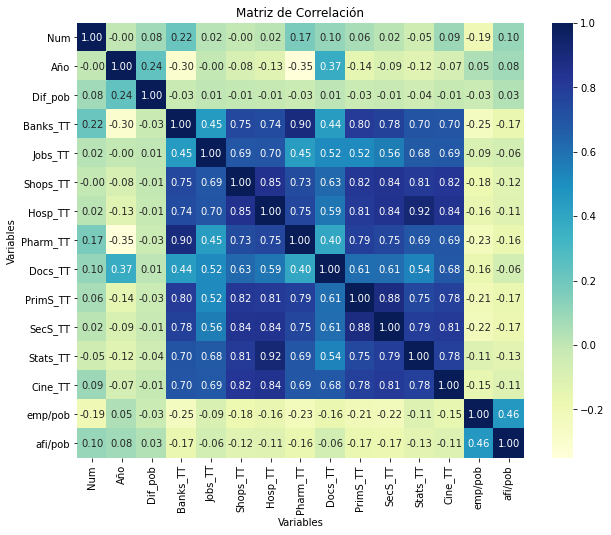

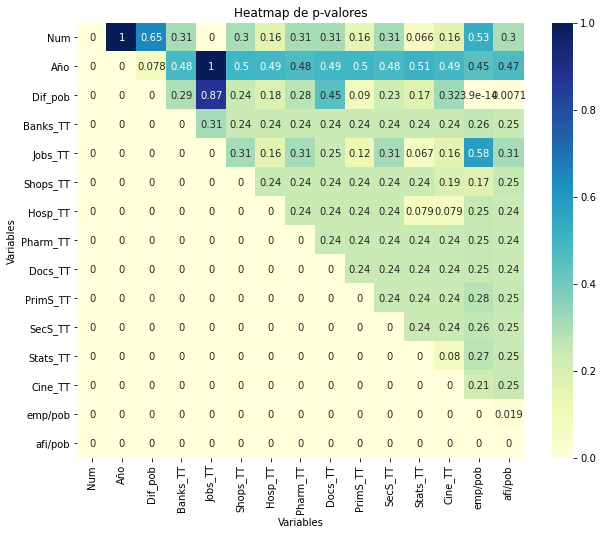

In [31]:
tf = tfdifpob
tf = tf.apply(pd.to_numeric, errors='coerce')

# Calcular matriz de correlación
correlation_matrix = tf.corr()

# Obtener la correlación máxima y sus índices
max_corr_value = correlation_matrix.max().max()
max_corr_indices = correlation_matrix.unstack().idxmax()

# Obtener nombres de las variables con la correlación máxima
variable1 = max_corr_indices[0]
variable2 = max_corr_indices[1]

# Crear mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Matriz de Correlación")
plt.xlabel("Variables")
plt.ylabel("Variables")



# ----------------------



# Obtener combinaciones de variables
comb = list(itertools.combinations(list(tf.columns), 2))

# Crear matriz de p-valores
p_values = np.zeros((len(tf.columns), len(tf.columns)))

# Calcular p-valores y llenar matriz
for c1, c2 in comb:
    contingency_table = pd.crosstab(tf[c1], tf[c2])
    c, p, dof, expected = chi2_contingency(contingency_table)
    p_values[tf.columns.get_loc(c1), tf.columns.get_loc(c2)] = p

# Crear mapa de calor con p-valores
plt.figure(figsize=(10, 8))
sns.heatmap(p_values, annot=True, cmap="YlGnBu", xticklabels=tf.columns, yticklabels=tf.columns)
plt.title("Heatmap de p-valores")
plt.xlabel("Variables")
plt.ylabel("Variables")



plt.show()

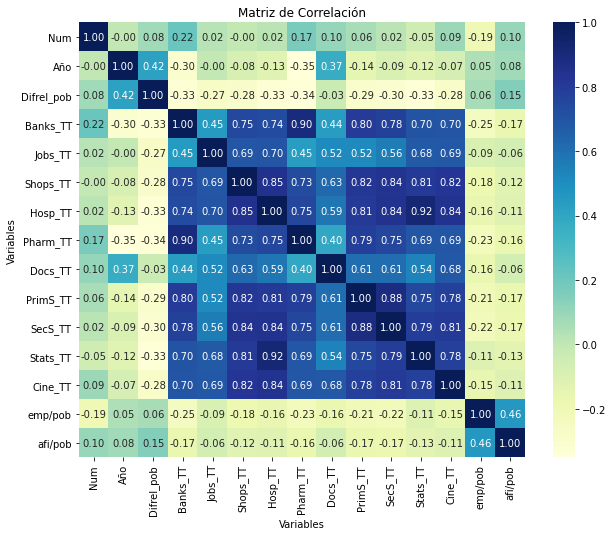

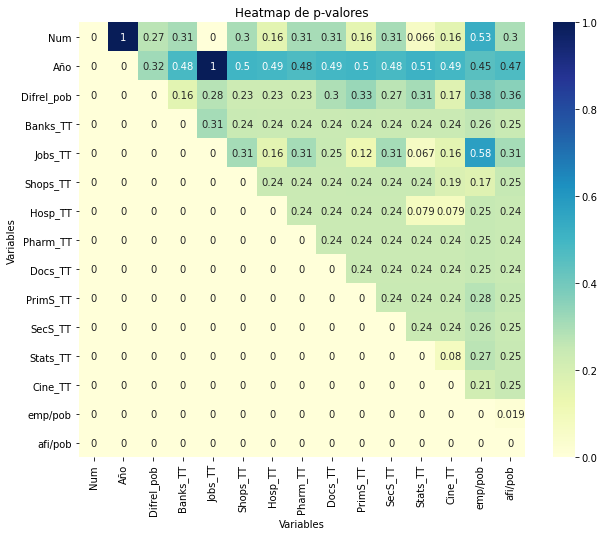

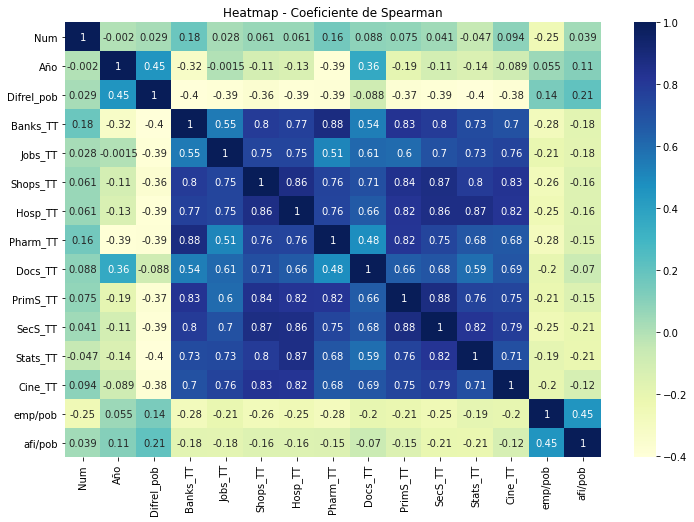

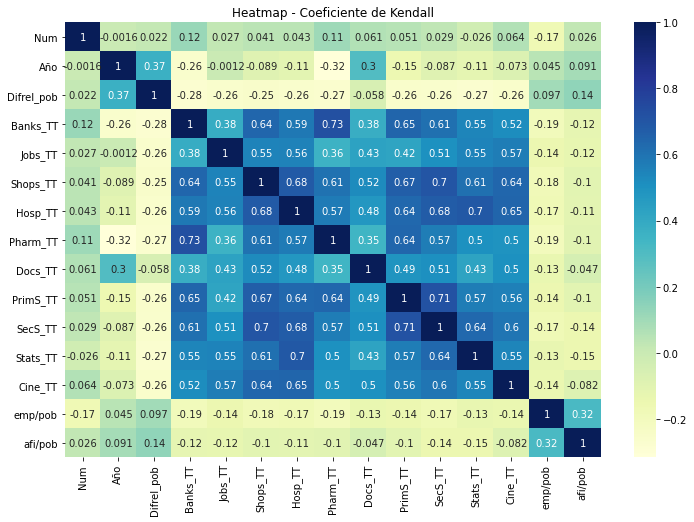

In [32]:
tf = tfdifrelpob
tf = tf.apply(pd.to_numeric, errors='coerce')

# Calcular matriz de correlación
correlation_matrix = tf.corr()

# Obtener la correlación máxima y sus índices
max_corr_value = correlation_matrix.max().max()
max_corr_indices = correlation_matrix.unstack().idxmax()

# Obtener nombres de las variables con la correlación máxima
variable1 = max_corr_indices[0]
variable2 = max_corr_indices[1]

# Crear mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Matriz de Correlación")
plt.xlabel("Variables")
plt.ylabel("Variables")

# Cercanos a 1 correlación lineal positiva, en negativo es correlación lineal negativa, 0 ninguna relación lineal

# ----------------------



# Obtener combinaciones de variables
comb = list(itertools.combinations(list(tf.columns), 2))

# Crear matriz de p-valores
p_values = np.zeros((len(tf.columns), len(tf.columns)))

# Calcular p-valores y llenar matriz
for c1, c2 in comb:
    contingency_table = pd.crosstab(tf[c1], tf[c2])
    c, p, dof, expected = chi2_contingency(contingency_table)
    p_values[tf.columns.get_loc(c1), tf.columns.get_loc(c2)] = p

# Crear mapa de calor con p-valores
plt.figure(figsize=(10, 8))
sns.heatmap(p_values, annot=True, cmap="YlGnBu", xticklabels=tf.columns, yticklabels=tf.columns)
plt.title("Heatmap de p-valores")
plt.xlabel("Variables")
plt.ylabel("Variables")


# Un p-valor cercano a 0 indica que hay evidencia significativa para rechazar la hipótesis nula. 
# En este caso, se considera que hay una relación significativa entre las variables analizadas.


# ----------------------



# Spearman se basa en los rangos de los datos y puede capturar relaciones no lineales.
# Si un aumento en una variable se asocia con un aumento o una disminución en la otra variable (magnituda de cambio)

# Calcular el coeficiente de Spearman
correlation_matrix = tf.corr(method='spearman')

# Generar el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Heatmap - Coeficiente de Spearman")

# 1 correlacionado positivamente, -1 negativamente y 0 no.

# ----------------------


# Es adecuado cuando tus variables son ordinales o cuando la relación no es lineal.
# Se enfoca en la concordancia de los pares de observaciones


# Calcular el coeficiente de Kendall
correlation_matrix = tf.corr(method='kendall')

# Generar el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Heatmap - Coeficiente de Kendall")

# 1 correlacionado positivamente, -1 negativamente y 0 no.

plt.show()